# Datacamp's Intermediate Python

## Line & scatter plot

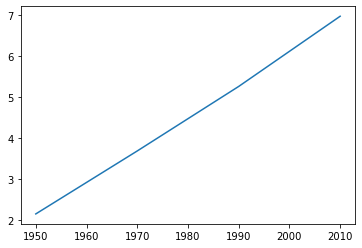

In [7]:
import matplotlib.pyplot as plt
year = [1950, 1970, 1990, 2010]
pop = [2.159, 3.692, 5.263, 6.972]
plt.plot( year, pop )
plt.show()

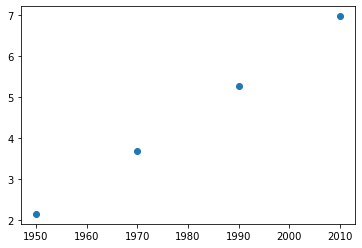

In [2]:
plt.scatter( year, pop )
plt.show()

## Histogram

gives a nice overview of the 'spread' of the data

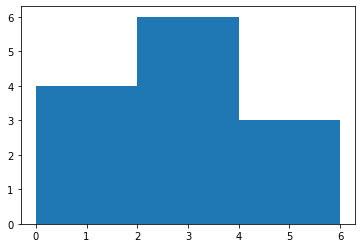

In [3]:
values = [ 0,0,6,1.4,1.6,2.2,2.5,2.6,3.2,3.5,3.9,4.2,6 ]
plt.hist( values, bins = 3 )
plt.show()

## Customization

colors, shapes, labels, axes....  
it all depends on the data and the story yu want to tell

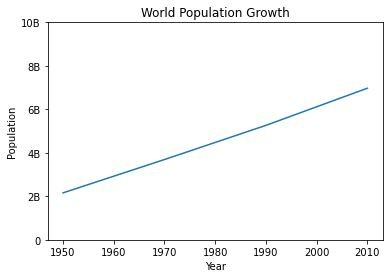

In [8]:
#call customizations before the show method
plt.plot( year, pop )
#add axes labels
plt.xlabel( 'Year' )
plt.ylabel( 'Population' )
plt.title( 'World Population Growth' )
plt.yticks( [0,2,4,6,8,10], ['0','2B','4B','6B','8B','10B'] )
plt.show()

In [32]:
#pandas
import pandas as pd
import numpy as np

#gapminder data set
gapminder_addy = 'https://raw.githubusercontent.com/SmilodonCub/DATA602/master/datasets_373567_758426_gapminder%20-%20gapminder.csv'

#csv data to dataframe
gapminder_df = pd.read_csv( gapminder_addy )

#add new col with continent color
conditionals = [ (gapminder_df['continent']=='Africa'), (gapminder_df['continent']=='Americas'), \
               (gapminder_df['continent']=='Asia'), (gapminder_df['continent']=='Europe'), \
               (gapminder_df['continent']=='Oceania') ]
choices = [ 'blue', 'purple', 'magenta', 'red', 'cyan' ]
gapminder_df[ 'colors' ] = np.select( conditionals, choices, default = 'black' )

gapminder_df.head()

,Unnamed: 0,country,year,population,continent,life_exp,gdp_cap,colors
0,11,Afghanistan,2007,31889923,Asia,43.828,974.580338,magenta
1,23,Albania,2007,3600523,Europe,76.423,5937.029526,red
2,35,Algeria,2007,33333216,Africa,72.301,6223.367465,blue
3,47,Angola,2007,12420476,Africa,42.731,4797.231267,blue
4,59,Argentina,2007,40301927,Americas,75.320,12779.379640,purple


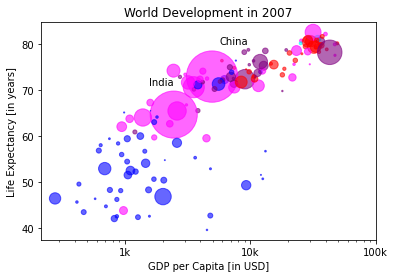

In [34]:
# Specify c and alpha inside plt.scatter()
plt.scatter(x = gapminder_df[ 'gdp_cap' ], y = gapminder_df[ 'life_exp' ], \
            s = 2 * np.array( gapminder_df[ 'population' ] ) / 1000000, \
            c = gapminder_df[ 'colors' ], alpha = 0.6)

# Previous customizations
plt.xscale('log') 
plt.xlabel('GDP per Capita [in USD]')
plt.ylabel('Life Expectancy [in years]')
plt.title('World Development in 2007')
plt.xticks([1000,10000,100000], ['1k','10k','100k'])

# Additional customizations
plt.text(1550, 71, 'India')
plt.text(5700, 80, 'China')


# Add grid() call
#plt.grid(True)
# Show the plot
plt.show()

## Dictionaries

paired relationships  
unlike lists, which index by a range of numbers, dictionaries index by unique keys.  
lists are best when a collection of ordered values can be subsetted easily.  dicts are best when a lookup table of unique keys is needed.  

In [36]:
world = { 'afghanistan': 30.55, 'albania': 2.77, 'algeria':39.21 }
world[ 'albania' ]

2.77

In [37]:
#valid dictionaries have immutable keys:
#valid
{0:'hello', True:'dear', 'two':'friend'}
#not valid
{['just','to','test']:'value'}

TypeError: unhashable type: 'list'

In [38]:
#adding to an existing dict
world[ 'sealand' ] = 0.000027
print( world )

{'afghanistan': 30.55, 'albania': 2.77, 'algeria': 39.21, 'sealand': 2.7e-05}


In [39]:
#removing from a dict
del world[ 'sealand' ]
print( world )

{'afghanistan': 30.55, 'albania': 2.77, 'algeria': 39.21}


## Pandas


In [41]:
brics_csv_addy = 'https://gist.githubusercontent.com/justimchung/5b666063161a45ad36fcf63a67079c63/raw/bc7c8db4812e1600b7dab61eb4617afe21fb033b/brics.csv'
brics_df = pd.read_csv( brics_csv_addy, index_col = 0 )
brics_df.head()

,country,capital,area,population
BR,Brazil,Brasilia,8.516,200.40
RU,Russia,Moscow,17.100,143.50
IN,India,New Delhi,3.286,1252.00
CH,China,Beijing,9.597,1357.00
SA,South Africa,Pretoria,1.221,52.98


In [49]:
#indexing and selecting data in dataframes
#as a pd series
print( type( brics_df[ 'country' ] ) )
#as a pd subdataframe
print( type( brics_df[ [ 'country' ] ] ) )
print( type( brics_df[ [ 'country', 'capital' ] ] ) )
#selecting rows
print( brics_df[ 1:4 ] )  #where indecing [inclusive:exclusive)

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
   country    capital    area  population
RU  Russia     Moscow  17.100       143.5
IN   India  New Delhi   3.286      1252.0
CH   China    Beijing   9.597      1357.0


pandas: selecting data
* square brackets
    * column access `df[['feature1','feature2']]`
    * row access by slicing `df[1:4]`
* `loc` == (label-based)
    * column access `df.loc[[ 'feature1','feature2' ]]`
    * row access `df.loc[['row1','row2']]`
    * row & column access `df.loc[['row1','row2'],[ 'feature1','feature2' ]]`
* `iloc`== (integer position-based)
    * column access `df.iloc[[ colnum1,colnum2 ]]`
    * row access `df.iloc[[rownum,rownum2]]`
    * row & column access `df.iloc[[rownum,rownum2],[ colnum1,colnum2 ]]`

In [51]:
#as a series
print( brics_df.loc[ "RU" ] )
print( type( brics_df.loc[ "RU" ] ) )
#as a dataframe
print( brics_df.loc[ [ "RU" ] ] )
print( type( brics_df.loc[ [ "RU" ] ] ) )

country       Russia
capital       Moscow
area            17.1
population     143.5
Name: RU, dtype: object
<class 'pandas.core.series.Series'>
   country capital  area  population
RU  Russia  Moscow  17.1       143.5
<class 'pandas.core.frame.DataFrame'>


In [54]:
#row access by loc
print( brics_df.loc[ [ 'RU', 'CH', 'SA' ] ] )
#specify rows and columns
print( brics_df.loc[ [ 'RU', 'CH', 'SA' ], [ 'country', 'capital' ] ] )

         country   capital    area  population
RU        Russia    Moscow  17.100      143.50
CH         China   Beijing   9.597     1357.00
SA  South Africa  Pretoria   1.221       52.98
         country   capital
RU        Russia    Moscow
CH         China   Beijing
SA  South Africa  Pretoria


## Comparison Operators

operators that can tell how two python objects relate and return a result in the form of a bool  
in general, try to make comparisons only between objects of the same type  

| Relational Operator |          Interpretation         |
|:-------------------:|:-------------------------------:|
|        x == y       |         x is equal to y         |
|        x != y       |       x is not equal to y       |
|        x > y        |       x is greater than y       |
|        x < y        |         x is less than y        |
|        x >= y       | x is greater than or equal to y |
|        x <= y       |   x is less than or equal to y  |

## Boolean Operators

`and`, `or` & `not`  
for arrays `logical_and()`, `logical_or()` & `logical_not()`

In [56]:
# Create arrays
import numpy as np
my_house = np.array([18.0, 20.0, 10.75, 9.50])
your_house = np.array([14.0, 24.0, 14.25, 9.0])

# my_house greater than 18.5 or smaller than 10
print( np.logical_or( my_house > 18.5, my_house < 10 ) )

# Both my_house and your_house smaller than 11
print( np.logical_and( my_house < 11, your_house < 11 ) )

[False  True False  True]
[False False False  True]


## if, elif, else

`if condition:`  
&nbsp;&nbsp;&nbsp;&nbsp;`expression`

## Filtering pandas dataframes

1. Get the column
2. Perform the comparison
3. Subset the DF

In [58]:
brics_df[ brics_df[ 'area' ] > 8 ]

,country,capital,area,population
BR,Brazil,Brasilia,8.516,200.4
RU,Russia,Moscow,17.100,143.5
CH,China,Beijing,9.597,1357.0


## while loop

`if condition:`  
&nbsp;&nbsp;&nbsp;&nbsp;`expression`  

iterates expression as long as the conditional statement evaluates `True`  
repeating an action untila condition is met.

In [59]:
# Initialize offset
offset = -6

# Code the while loop
while offset != 0 :
    print("correcting...")
    if offset > 0 :
        offset -= 1
    else :
        offset += 1
    print(offset)

correcting...
-5
correcting...
-4
correcting...
-3
correcting...
-2
correcting...
-1
correcting...
0


## for loop

`for var in seq:`  
&nbsp;&nbsp;&nbsp;&nbsp;`expression`  

for each var in seq, execute expression  

In [61]:
#using enumerate

fam = [ 1.73, 1.68, 1.71, 1.89 ]
for index, height in enumerate( fam):
    print( "index " + str( index ) + ": " + str( height ) )

index 0: 1.73
index 1: 1.68
index 2: 1.71
index 3: 1.89


## looping over other data structures


In [64]:
# Definition of dictionary
europe = {'spain':'madrid', 'france':'paris', 'germany':'berlin',
          'norway':'oslo', 'italy':'rome', 'poland':'warsaw', 'austria':'vienna' }
          
# Iterate over europe
for k,v in europe.items():
    print( 'the capital of ' + k + ' is ' + v )

the capital of spain is madrid
the capital of france is paris
the capital of germany is berlin
the capital of norway is oslo
the capital of italy is rome
the capital of poland is warsaw
the capital of austria is vienna


In [65]:
#numpy array
# Import numpy as np
import numpy as np

# For loop over np_height
#for val in np_height:
#    print( str( val ) + ' inches' )

# For loop over np_baseball
#for val in np.nditer( np_baseball ):
#    print( val )

NameError: name 'np_height' is not defined

In [68]:
#pandas dataframe
for lab, row in brics_df.iterrows():
    print( str( lab ) + '\t' + str( row ) )


BR	country         Brazil
capital       Brasilia
area             8.516
population       200.4
Name: BR, dtype: object
RU	country       Russia
capital       Moscow
area            17.1
population     143.5
Name: RU, dtype: object
IN	country           India
capital       New Delhi
area              3.286
population         1252
Name: IN, dtype: object
CH	country         China
capital       Beijing
area            9.597
population       1357
Name: CH, dtype: object
SA	country       South Africa
capital           Pretoria
area                 1.221
population           52.98
Name: SA, dtype: object


In [70]:
for lab, row in brics_df.iterrows():
    print( lab + ': ' + row[ 'capital' ] )

BR: Brasilia
RU: Moscow
IN: New Delhi
CH: Beijing
SA: Pretoria


In [74]:
for lab, row in brics_df.iterrows():
    brics_df.loc[ lab, 'name_length' ] = len( row[ 'country' ] )
    
print( brics_df )

         country    capital    area  population  name_length
BR        Brazil   Brasilia   8.516      200.40          6.0
RU        Russia     Moscow  17.100      143.50          6.0
IN         India  New Delhi   3.286     1252.00          5.0
CH         China    Beijing   9.597     1357.00          5.0
SA  South Africa   Pretoria   1.221       52.98         12.0


In [77]:
#more efficient with apply
f = lambda x, y : x / y
brics_df[ 'pop_density' ] = brics_df.apply(lambda x: f(x.population, x.area), axis=1)
print( brics_df )

         country    capital    area  population  name_length  pop_density
BR        Brazil   Brasilia   8.516      200.40          6.0    23.532175
RU        Russia     Moscow  17.100      143.50          6.0     8.391813
IN         India  New Delhi   3.286     1252.00          5.0   381.010347
CH         China    Beijing   9.597     1357.00          5.0   141.398354
SA  South Africa   Pretoria   1.221       52.98         12.0    43.390663


## Random Numbers

**random generators!**

In [81]:
print( np.random.rand() ) #pseudo-random numbers this gives a different random number with each call
print( np.random.rand() ) 

0.2268514535642031
0.5513147690828912


In [83]:
np.random.seed( 123 ) #when you set the seed, you can repeat this call and get the same result
print( np.random.rand() )  
np.random.seed( 123 ) 
print( np.random.rand() ) 

0.6964691855978616
0.6964691855978616


In [99]:
# coin toss
#np.random.seed( 123 )
coin = np.random.randint( 0,2 ) #randomly generate 0 or 1
print( coin )
if coin == 0:
    print( 'heads' )
else:
    print( 'tails' )

1
tails


In [104]:
#random walk
outcomes = []
for x in range( 10 ):
    coin = np.random.randint( 0,2 )
    if coin == 0:
        outcomes.append( 'head' )
    else:
        outcomes.append( 'tails')
print( outcomes )

['head', 'head', 'tails', 'head', 'tails', 'head', 'head', 'tails', 'head', 'tails']


[0, 0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 6, 7, 8, 10, 9, 10, 11, 14, 16, 17, 16, 15, 14, 13, 12, 13, 12, 13, 15, 16, 17, 16, 17, 16, 15, 16, 15, 14, 13, 14, 13, 12, 13, 14, 15, 17, 18, 19, 18, 17, 18, 24, 23, 24, 25, 30, 29, 30, 29, 30, 31, 30, 31, 32, 38, 39, 40, 41, 40, 42, 43, 44, 45, 44, 45, 46, 47, 48, 47, 48, 47, 48, 49, 48, 49, 53, 54, 57, 58, 62, 63, 62, 63, 64, 63, 62, 67, 68, 69]


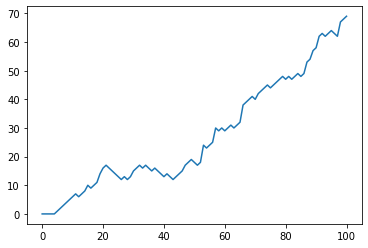

In [112]:
# Numpy is imported, seed is set

# Initialize random_walk
random_walk = [ 0 ]
iterations = 100

# Complete the ___
for x in range(iterations) :
    # Set step: last element in random_walk
    step = random_walk[ -1 ]

    # Roll the dice
    dice = np.random.randint(1,7)

    # Determine next step
    if dice <= 2:
        step = max( 0, step - 1 )
    elif dice <= 5:
        step = step + 1
    else:
        step = step + np.random.randint(1,7)

    # append next_step to random_walk
    random_walk.append(step)

# Print random_walk
print( random_walk )

# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Plot random_walk
plt.plot( random_walk )

# Show the plot
plt.show()

## Distribution
histograms & probabilities

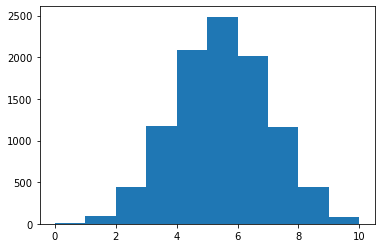

In [120]:
np.random.seed( 123 )
final_tails = []
for x in range( 10000 ):
    tails = [0]
    for x in range( 10 ):
        coin = np.random.randint( 0,2 )
        tails.append( tails[ x ] + coin )
    final_tails.append( tails[ -1 ] )
plt.hist( final_tails, bins = 10 )
plt.show()

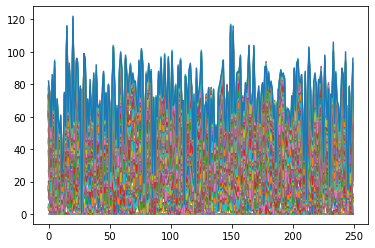

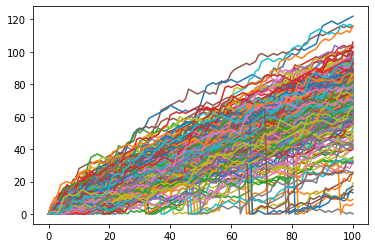

In [122]:
# initialize and populate all_walks
all_walks = []
for i in range(250) :
    random_walk = [0]
    for x in range(100) :
        step = random_walk[-1]
        dice = np.random.randint(1,7)
        if dice <= 2:
            step = max(0, step - 1)
        elif dice <= 5:
            step = step + 1
        else:
            step = step + np.random.randint(1,7)
        # Implement clumsiness
        if np.random.rand() <= 0.001 :
            step = 0
        random_walk.append(step)
    all_walks.append(random_walk)

# Convert all_walks to Numpy array: np_aw
np_aw = np.array( all_walks )

# Plot np_aw and show
#plt.clf()
plt.plot( np_aw )
plt.show()

# Clear the figure
plt.clf()

# Transpose np_aw: np_aw_t
np_aw_t = np.transpose( np_aw )

# Plot np_aw_t and show
plt.plot( np_aw_t )
plt.show()